# Assignment 8: Data Aggregation and Group Operations

## Overview
This assignment covers data aggregation and group operations using healthcare/insurance EHR data. You'll analyze patient encounters (insurance claims), healthcare providers, and medical facilities across different regions. The data includes provider statistics, facility information, and encounter charges with insurance coverage details.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set random seed for reproducibility
np.random.seed(42)

# Create output directory
os.makedirs('output', exist_ok=True)

## Question 1: Basic GroupBy Operations

### Part 1.1: Load and Explore Data

**TODO: Load and merge the datasets**

In [2]:
# TODO: Load the three CSV files into dataframes
provider_df = pd.read_csv("data/provider_data.csv")
facility_df = pd.read_csv("data/facility_data.csv")
encounter_df = pd.read_csv("data/encounter_data.csv")

# TODO: Print the shapes of each dataframe
print("Provider data shape:", provider_df.shape)
print("Facility data shape:", facility_df.shape)
print("Encounter data shape:", encounter_df.shape)

# TODO: Merge the dataframes for analysis
# Hint: Start by merging encounter_df with provider_df on 'provider_id'
#       Then merge the result with facility_df on 'facility_id'
# Note: Both encounter_df and provider_df have 'facility_id', and both encounter_df and facility_df have 'region'
#       After merging, you may need to handle duplicate column names (pandas will add suffixes like _x and _y)
#       You can drop one of the duplicate columns and rename if needed

encounter_provider_merge = pd.merge(encounter_df, provider_df, on = "provider_id", how = "left")
encounter_provider_merge = encounter_provider_merge.drop(columns = ["facility_id_y"])
encounter_provider_merge = encounter_provider_merge.rename(columns = {"facility_id_x": "facility_id"})
merged_df = pd.merge(encounter_provider_merge, facility_df, on = "facility_id", how = "left")
merged_df = merged_df.drop(columns = ["region_y"])
merged_df = merged_df.rename(columns = {"region_x": "region"})

# TODO: Print the merged dataframe shape, columns, and first few rows
print("\nMerged data shape:", merged_df.shape)
print("\nColumns:", merged_df.columns)
print("\nFirst few rows:", merged_df.head(5))


Provider data shape: (500, 7)
Facility data shape: (10, 6)
Encounter data shape: (5000, 12)

Merged data shape: (5000, 21)

Columns: Index(['encounter_id', 'patient_id', 'provider_id', 'facility_id',
       'encounter_date', 'encounter_type', 'diagnosis_code', 'procedure_code',
       'service_charge', 'insurance_paid', 'patient_paid', 'region',
       'provider_name', 'provider_type', 'specialty', 'years_experience',
       'license_number', 'facility_name', 'facility_type', 'beds',
       'established_date'],
      dtype='object')

First few rows:   encounter_id patient_id provider_id facility_id encounter_date  \
0     ENC00001   PAT01564      PR0259      FAC004     2023-08-21   
1     ENC00002   PAT00296      PR0258      FAC001     2023-09-11   
2     ENC00003   PAT01381      PR0213      FAC001     2023-03-20   
3     ENC00004   PAT01131      PR0146      FAC004     2023-09-03   
4     ENC00005   PAT01388      PR0354      FAC003     2023-06-14   

         encounter_type diagnosis_c

### Part 1.2: Basic Aggregation

**TODO: Perform basic groupby operations**

In [3]:
# TODO: Group by facility (healthcare facility) and calculate basic stats
# TODO: Calculate mean, sum, count for years_experience by facility
# TODO: Calculate total encounter charges by facility
# TODO: Calculate total insurance payments by facility
# TODO: Find the facility with highest total encounter charges

grouped = merged_df.groupby("facility_name").agg({"years_experience": ["mean", "sum", "count"], "service_charge" : "sum", "insurance_paid" : "sum"})
grouped = grouped.sort_values(by = ("service_charge", "sum"), ascending = False)
display(grouped.head(5))
print("Facility with the highest total encounter charges:", grouped.index[0])

# TODO: Create a summary dataframe with one row per facility showing:
#       facility_name, total_providers, avg_years_experience, total_service_charge, total_insurance_paid

summary_df = merged_df.groupby("facility_name").agg(
        total_providers = ("provider_id", "nunique"),
        avg_years_experience = ("years_experience" , "mean"),
        total_service_charges = ("service_charge", "sum"),
        total_insurance_paid = ("insurance_paid", "sum")).reset_index()
display(summary_df)
# TODO: Save the summary dataframe as 'output/q1_groupby_analysis.csv'
summary_df.to_csv("output/q1_groupby_analysis.csv", index = False)


years_experience              service_charge  \
                                      mean    sum count            sum   
facility_name                                                            
Pediatric Care Center            19.811676  10520   531      361811.04   
Surgical Specialty Center        20.778182  11428   550      349909.18   
Community Health Clinic          20.160784  10282   510      334992.21   
Oncology Treatment Center        19.381139   9865   509      334927.30   
Primary Care Clinic              20.102970  10152   505      323315.71   

                          insurance_paid  
                                     sum  
facility_name                             
Pediatric Care Center          291790.95  
Surgical Specialty Center      278503.38  
Community Health Clinic        269207.92  
Oncology Treatment Center      267183.95  
Primary Care Clinic            260297.44

Facility with the highest total encounter charges: Pediatric Care Center


,facility_name,total_providers,avg_years_experience,total_service_charges,total_insurance_paid
0,Cardiology Specialty Center,297,19.319728,276658.83,222139.04
1,City General Hospital,312,19.563008,295508.13,236798.50
2,Community Health Clinic,328,20.160784,334992.21,269207.92
3,Emergency Medical Center,299,19.668687,310735.25,248439.20
4,Northside Urgent Care,305,20.137014,297283.06,236839.71
5,Oncology Treatment Center,324,19.381139,334927.30,267183.95
6,Pediatric Care Center,326,19.811676,361811.04,291790.95
7,Primary Care Clinic,316,20.102970,323315.71,260297.44
8,Regional Medical Center,309,20.209205,316284.98,251750.43
9,Surgical Specialty Center,340,20.778182,349909.18,278503.38


### Part 1.3: Transform Operations

**TODO: Use transform operations to add group statistics**

In [61]:
# TODO: Add facility mean years_experience as new column
# TODO: Add facility standard deviation of years_experience
# TODO: Create normalized years_experience (z-score within facility)
# TODO: Add facility total encounter charges as new column

# TODO: Display the enhanced dataframe
# TODO: Save results as 'output/q1_aggregation_report.txt'

enhanced_df = merged_df.copy()
enhanced_df["mean years_experience"] = enhanced_df.groupby("facility_name")["years_experience"].transform("mean")
enhanced_df["std years_experience"] = enhanced_df.groupby("facility_name")["years_experience"].transform("std")
enhanced_df["normalized years_experience"] = enhanced_df.groupby("facility_name")["years_experience"].transform(lambda x: (x - x.mean()) / x.std())
enhanced_df["total encounter charges"] = enhanced_df.groupby("facility_name")["service_charge"].transform("sum")

display(enhanced_df)

with open("output/q1_aggregation_report.txt", "w") as file:
    file.write("Assignment 8\n")
    file.write(enhanced_df.to_string(index = False))


,encounter_id,patient_id,provider_id,facility_id,encounter_date,encounter_type,diagnosis_code,procedure_code,service_charge,insurance_paid,...,years_experience,license_number,facility_name,facility_type,beds,established_date,mean years_experience,std years_experience,normalized years_experience,total encounter charges
0,ENC00001,PAT01564,PR0259,FAC004,2023-08-21,Office Visit,M79.3,99213,345.03,290.33,...,11,LIC000259,Northside Urgent Care,Urgent Care,313,1994-10-04,20.137014,10.581439,-0.863495,297283.06
1,ENC00002,PAT00296,PR0258,FAC001,2023-09-11,Inpatient,N18.9,85025,550.48,482.51,...,19,LIC000258,City General Hospital,Urgent Care,276,1999-11-27,19.563008,10.702137,-0.052607,295508.13
2,ENC00003,PAT01381,PR0213,FAC001,2023-03-20,Lab,K21.9,80053,149.84,116.67,...,3,LIC000213,City General Hospital,Urgent Care,276,1999-11-27,19.563008,10.702137,-1.547636,295508.13
3,ENC00004,PAT01131,PR0146,FAC004,2023-09-03,Outpatient Procedure,H52.9,70450,1468.48,1198.71,...,6,LIC000146,Northside Urgent Care,Urgent Care,313,1994-10-04,20.137014,10.581439,-1.336020,297283.06
4,ENC00005,PAT01388,PR0354,FAC003,2023-06-14,Emergency,G43.9,99214,672.23,507.22,...,36,LIC000354,Regional Medical Center,Urgent Care,459,1982-05-10,20.209205,11.575935,1.364105,316284.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ENC04996,PAT01045,PR0065,FAC002,2023-05-27,Emergency,K21.9,70450,5064.91,3932.06,...,36,LIC000065,Community Health Clinic,Urgent Care,160,2023-03-31,20.160784,11.044011,1.434191,334992.21
4996,ENC04997,PAT00658,PR0204,FAC004,2023-09-26,Lab,M79.3,99214,191.82,150.07,...,15,LIC000204,Northside Urgent Care,Urgent Care,313,1994-10-04,20.137014,10.581439,-0.485474,297283.06
4997,ENC04998,PAT01902,PR0174,FAC006,2023-04-25,Emergency,J44.9,80053,347.27,267.46,...,15,LIC000174,Oncology Treatment Center,Hospital,252,1994-03-19,19.381139,10.872386,-0.402960,334927.30
4998,ENC04999,PAT00925,PR0083,FAC006,2023-01-09,Lab,M79.3,99213,157.93,111.65,...,24,LIC000083,Oncology Treatment Center,Hospital,252,1994-03-19,19.381139,10.872386,0.424825,334927.30


## Question 2: Advanced GroupBy Operations

### Part 2.1: Filter Operations

**TODO: Use filter operations to remove groups**

In [5]:
# TODO: Filter facilities with more than 20 providers (sufficient staffing)

sufficient_staffing = merged_df.groupby("facility_name").filter(lambda x: x["provider_id"].nunique() > 20)
print("Number of facilities with sufficient staffing:", 
      sufficient_staffing["facility_name"].nunique())

# TODO: Filter facilities with average years_experience > 10 (experienced staff)

experienced_staff = merged_df.groupby("facility_name").filter(lambda x: x["years_experience"].mean() > 10)
print("Number of facilities with experienced staff:", 
      experienced_staff["facility_name"].nunique())

# TODO: Filter facilities with total encounter charges > 250000 (high volume)
high_volume = merged_df.groupby("facility_name").filter(lambda x: x["service_charge"].sum() > 250000)
print("Number of facilities with high volume:", 
      high_volume["facility_name"].nunique())

# TODO: Create a summary of filtered results

filter_summary = pd.DataFrame({
    "Filters": [
        "Sufficient Staffing (>20 providers)",
        "Experienced Staff (avg years > 10)",
        "High Volume (total charges > 250,000)"
    ],
    "Facilities Passing Filter": [
        sufficient_staffing["facility_name"].nunique(),
        experienced_staff["facility_name"].nunique(),
        high_volume["facility_name"].nunique()
    ]
})

display(filter_summary)
# TODO: Save results as 'output/q2_filter_analysis.csv'
filter_summary.to_csv("output/q2_filter_analysis.csv", index = False)

Number of facilities with sufficient staffing: 10
Number of facilities with experienced staff: 10
Number of facilities with high volume: 10


,Filters,Facilities Passing Filter
0,Sufficient Staffing (>20 providers),10
1,Experienced Staff (avg years > 10),10
2,"High Volume (total charges > 250,000)",10


### Part 2.2: Apply Operations

**TODO: Use apply operations with custom functions**

In [62]:
# TODO: Create custom function to calculate provider statistics
def provider_stats(group):
    # TODO: Return mean, std, min, max, range for years_experience
    return pd.Series({
        "mean": group["years_experience"].mean(),
        "std": group["years_experience"].std(),
        "min": group["years_experience"].min(),
        "max": group["years_experience"].max(),
        "range": group["years_experience"].max() - group["years_experience"].min()
    })

# TODO: Apply custom function to each facility
# Note: Add include_groups=False to avoid pandas FutureWarning about groupby columns
facility_provider_stats = merged_df.groupby('facility_name').apply(provider_stats, include_groups=False)

# TODO: Create function to find top providers in each facility
def top_providers(group, n=2):
    """Return top n providers in a group by encounter volume"""
    # TODO: Return top n rows by encounter count, selecting only provider_id, provider_name, 
    #       years_experience, specialty
    encounter_counts = (
        group.groupby(["provider_id", "provider_name", "years_experience", "specialty"])
        ["encounter_id"]
        .count()
        .reset_index(name="encounter_count")
    )
    top_n = encounter_counts.sort_values("encounter_count", ascending=False).head(n)

    # Return only the relevant columns
    return top_n

# TODO: Apply function to get top 2 providers per facility
# IMPORTANT: When using groupby().apply(), the result has a MultiIndex where:
# - Level 0: The grouping column (facility_name)
# - Level 1: The original row index from each group
# Use reset_index(level=0) to move only the grouping column back to a regular column
# DO NOT use reset_index(drop=True) - that would drop ALL index levels including facility_name!
top_providers_by_facility = merged_df.groupby('facility_name').apply(
    lambda x: top_providers(x, n=2)
).reset_index(level=0)  # Moves facility_name from index to column

# TODO: Save results as 'output/q2_performance_report.txt'
with open("output/q2_performance_report.txt", "w") as file:
    file.write("Assignment 8\n")
    file.write(top_providers_by_facility.to_string(index = False))



/tmp/ipykernel_4322/347976695.py:38: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_providers_by_facility = merged_df.groupby('facility_name').apply(


### Part 2.3: Hierarchical Grouping

**TODO: Perform multi-level grouping**

In [59]:
# TODO: Group by facility type and region
# TODO: Calculate statistics for each facility_type-region combination

hierarchical_stats = merged_df.groupby(["facility_type", "region"]).agg(
    total_facilities=("facility_name", "nunique"),
    total_providers=("provider_id", "nunique"),
    avg_years_experience=("years_experience", "mean"),
    total_service_charge=("service_charge", "sum"),
    total_insurance_paid=("insurance_paid", "sum")
)

display(hierarchical_stats)

# TODO: Use unstack to convert to wide format
wide_format = hierarchical_stats.unstack()
display(wide_format)
# TODO: Use stack to convert back to long format
long_format = wide_format.stack()
display(long_format)

# TODO: Analyze the hierarchical structure
# TODO: Save results as 'output/q2_hierarchical_analysis.csv'

hierarchical_stats.to_csv("output/q2_hierarchical_analysis.csv")

total_facilities  total_providers  \
facility_type    region                                      
Hospital         South                  1              324   
Specialty Center South                  2              424   
                 West                   2              427   
Urgent Care      North                  1              328   
                 South                  2              430   
                 West                   2              444   

                         avg_years_experience  total_service_charge  \
facility_type    region                                               
Hospital         South              19.381139             334927.30   
Specialty Center South              19.742690             672546.29   
                 West               19.737844             599974.54   
Urgent Care      North              20.160784             334992.21   
                 South              19.881443             611793.11   
                 West               20.476420             647192.24   

                         total_insurance_paid  
facility_type    region                        
Hospital         South              267183.95  
Specialty Center South              540230.15  
                 West               482436.48  
Urgent Care      North              269207.92  
                 South              488548.93  
                 West               515343.09

total_facilities            total_providers                \
region                      North South West           North  South   West   
facility_type                                                                
Hospital                      NaN   1.0  NaN             NaN  324.0    NaN   
Specialty Center              NaN   2.0  2.0             NaN  424.0  427.0   
Urgent Care                   1.0   2.0  2.0           328.0  430.0  444.0   

                 avg_years_experience                        \
region                          North      South       West   
facility_type                                                 
Hospital                          NaN  19.381139        NaN   
Specialty Center                  NaN  19.742690  19.737844   
Urgent Care                 20.160784  19.881443  20.476420   

                 total_service_charge                        \
region                          North      South       West   
facility_type                                                 
Hospital                          NaN  334927.30        NaN   
Specialty Center                  NaN  672546.29  599974.54   
Urgent Care                 334992.21  611793.11  647192.24   

                 total_insurance_paid                        
region                          North      South       West  
facility_type                                                
Hospital                          NaN  267183.95        NaN  
Specialty Center                  NaN  540230.15  482436.48  
Urgent Care                 269207.92  488548.93  515343.09

/tmp/ipykernel_4322/1890939546.py:18: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  long_format = wide_format.stack()


total_facilities  total_providers  \
facility_type    region                                      
Hospital         South                1.0            324.0   
Specialty Center South                2.0            424.0   
                 West                 2.0            427.0   
Urgent Care      North                1.0            328.0   
                 South                2.0            430.0   
                 West                 2.0            444.0   

                         avg_years_experience  total_service_charge  \
facility_type    region                                               
Hospital         South              19.381139             334927.30   
Specialty Center South              19.742690             672546.29   
                 West               19.737844             599974.54   
Urgent Care      North              20.160784             334992.21   
                 South              19.881443             611793.11   
                 West               20.476420             647192.24   

                         total_insurance_paid  
facility_type    region                        
Hospital         South              267183.95  
Specialty Center South              540230.15  
                 West               482436.48  
Urgent Care      North              269207.92  
                 South              488548.93  
                 West               515343.09

## Question 3: Pivot Tables and Cross-Tabulations

### Part 3.1: Basic Pivot Tables

**TODO: Create pivot tables for multi-dimensional analysis**

In [50]:
# TODO: Create pivot table: encounter charges by procedure code and region

pivot = pd.pivot_table(merged_df, values = "service_charge", index = "procedure_code", columns = "region")

# TODO: Create pivot table with multiple aggregations (sum, mean, count)
# TODO: Add totals (margins) to pivot table
# TODO: Handle missing values with fill_value

display(pivot)

pivot_aggs = pd.pivot_table(merged_df,
                            values= "service_charge",
                            index= "procedure_code",
                            columns= "region",
                            aggfunc=["sum", "mean", "count"], margins = True, fill_value = 0)

display(pivot_aggs)
# Tip: When saving a pivot table to CSV, the index (row labels) is preserved by default.
#      This is usually desired - when reading back, use index_col=0 to restore the index.
# TODO: Save results as 'output/q3_pivot_analysis.csv'
pivot_aggs.to_csv("output/q3_pivot_analysis.csv")

region,North,South,West
procedure_code,,,
36415,466.551923,416.093309,425.070614
70450,3222.744643,2665.909220,2623.567479
70551,2935.823889,2762.556000,2925.296727
72040,369.784839,471.160349,425.559323
80053,284.578654,297.339645,269.771382
85025,255.616286,312.035924,287.106549
93000,354.909474,382.694178,440.820962
99213,460.321630,498.116682,473.935631
99214,465.481039,489.426480,474.496858


sum                                             mean  \
region              North       South        West         All        North   
procedure_code                                                               
36415            12130.35    57836.97    48458.05   118425.37   466.551923   
70450            90236.85   375893.20   312204.53   778334.58  3222.744643   
70551            52844.83   234817.26   160891.32   448553.41  2935.823889   
72040            11463.33    81039.58    56599.39   149102.30   369.784839   
80053            14798.09    83849.78    58540.39   157188.26   284.578654   
85025             8946.57    48989.64    40769.13    98705.34   255.616286   
93000             6743.28    55873.35    45845.38   108462.01   354.909474   
99213            62143.42   327262.66   259242.79   648648.87   460.321630   
99214            71684.08   322532.05   240095.41   634311.54   465.481039   
99283             4001.41    31172.21    24520.39    59694.01   333.450833   
All             334992.21  1619266.70  1247166.78  3201425.69   656.847471   

                                                      count                    
region                South         West          All North South  West   All  
procedure_code                                                                 
36415            416.093309   425.070614   424.463692    26   139   114   279  
70450           2665.909220  2623.567479  2702.550625    28   141   119   288  
70551           2762.556000  2925.296727  2838.945633    18    85    55   158  
72040            471.160349   425.559323   443.756845    31   172   133   336  
80053            297.339645   269.771382   285.278149    52   282   217   551  
85025            312.035924   287.106549   295.524970    35   157   142   334  
93000            382.694178   440.820962   403.204498    19   146   104   269  
99213            498.116682   473.935631   484.427834   135   657   547  1339  
99214            489.426480   474.496858   480.903366   154   659   506  1319  
99283            465.256866   510.841458   470.031575    12    67    48   127  
All              646.413852   628.295607   640.285138   510  2505  1985  5000

### Part 3.2: Cross-Tabulations

**TODO: Create cross-tabulations for categorical analysis**

In [41]:
# TODO: Create crosstab of facility type vs region with counts
# TODO: Create crosstab with margins (row and column totals)
crosstab = pd.crosstab(merged_df["facility_type"], 
                      merged_df["region"], 
                      margins=True)
crosstab = crosstab.rename(columns = {"All" : "Total"}, index = {"All" : "Total"})
display(crosstab)

# TODO: Create multi-dimensional crosstab showing facility type × encounter type × region combinations
#       (Hint: use pd.crosstab with multiple index/column parameters, or create manually from the data)
multi_crosstab = pd.crosstab(index = [merged_df["facility_type"], merged_df["encounter_type"]], 
                      columns = merged_df["region"], 
                      margins=True)

display(multi_crosstab)

# TODO: Analyze the cross-tabulation results

total_by_facility = multi_crosstab.sum(axis=1).groupby(level=0).sum()
total_by_region = multi_crosstab.sum(axis=0)

# TODO: Save results as 'output/q3_crosstab_analysis.csv'

multi_crosstab.to_csv("output/q3_crosstab_analysis.csv")




region,North,South,West,Total
facility_type,,,,
Hospital,0,509,0,509
Specialty Center,0,1026,946,1972
Urgent Care,510,970,1039,2519
Total,510,2505,1985,5000


region                                 North  South  West   All
facility_type    encounter_type                                
Hospital         Emergency                 0    127     0   127
                 Inpatient                 0     95     0    95
                 Lab                       0    100     0   100
                 Office Visit              0     85     0    85
                 Outpatient Procedure      0    102     0   102
Specialty Center Emergency                 0    236   182   418
                 Inpatient                 0    210   191   401
                 Lab                       0    211   180   391
                 Office Visit              0    175   200   375
                 Outpatient Procedure      0    194   193   387
Urgent Care      Emergency               109    190   195   494
                 Inpatient                90    190   201   481
                 Lab                      90    229   228   547
                 Office Visit            112    178   200   490
                 Outpatient Procedure    109    183   215   507
All                                      510   2505  1985  5000

### Part 3.3: Pivot Table Visualization

**TODO: Create visualizations from pivot tables**

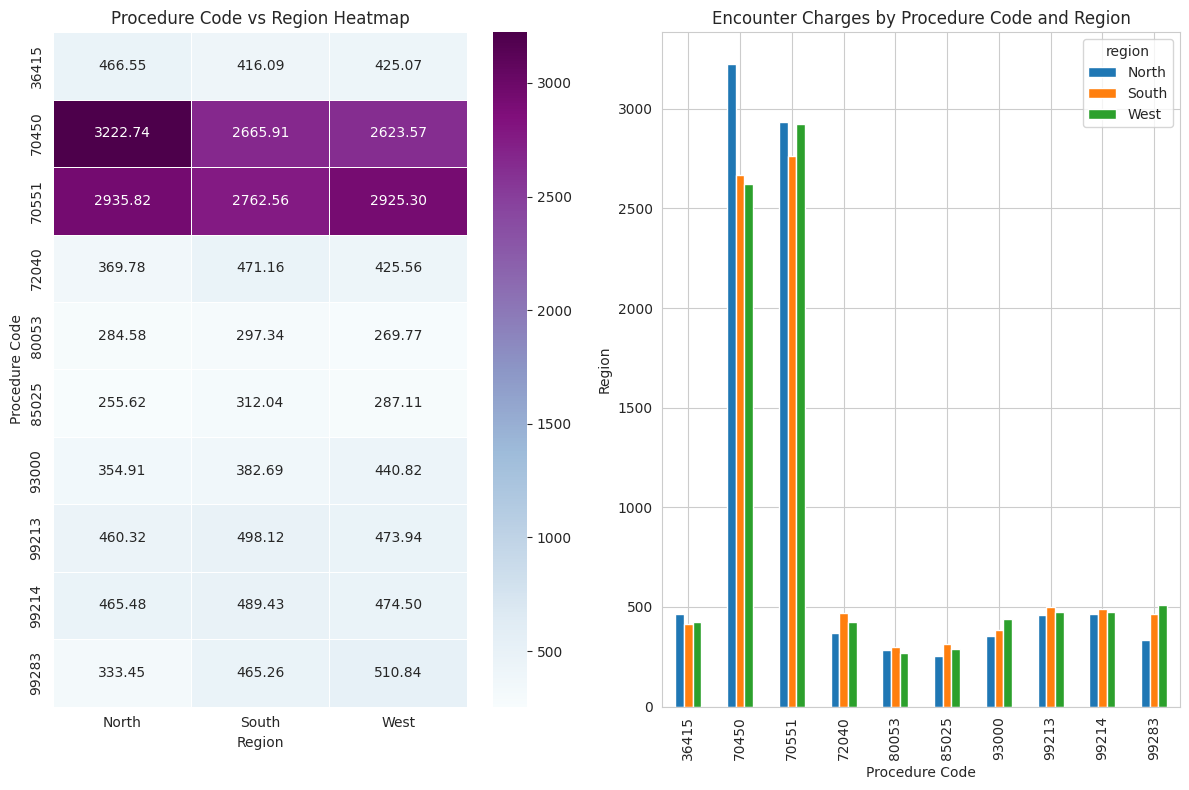

In [58]:
# TODO: Create heatmap from pivot table
# TODO: Create bar chart from pivot table
# TODO: Customize colors and styling
# TODO: Add appropriate titles and labels

sns.set_style('whitegrid')
tips = sns.load_dataset('tips')
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

sns.heatmap(data = pivot, ax = axes[0], cmap = "BuPu", annot = True, fmt = ".2f", linewidths = 0.5)
axes[0].set_title("Procedure Code vs Region Heatmap")
axes[0].set_xlabel("Region")
axes[0].set_ylabel("Procedure Code")
pivot.plot(kind = "bar", ax = axes[1], title = "Encounter Charges by Procedure Code and Region",
                   xlabel = "Procedure Code", ylabel = "Region")

plt.tight_layout()

# TODO: Save the plot as 'output/q3_pivot_visualization.png'
plt.savefig("output/q3_pivot_visualization.png", dpi=300, bbox_inches='tight')


## Submission Checklist

Before submitting, verify you've created:

- [ ] `output/q1_groupby_analysis.csv` - Basic groupby analysis
- [ ] `output/q1_aggregation_report.txt` - Aggregation report
- [ ] `output/q2_filter_analysis.csv` - Filter operations analysis
- [ ] `output/q2_hierarchical_analysis.csv` - Hierarchical analysis
- [ ] `output/q2_performance_report.txt` - Performance report
- [ ] `output/q3_pivot_analysis.csv` - Pivot table analysis
- [ ] `output/q3_crosstab_analysis.csv` - Cross-tabulation analysis
- [ ] `output/q3_pivot_visualization.png` - Pivot visualization

## Key Learning Objectives

- Master the split-apply-combine paradigm
- Apply aggregation functions and transformations
- Create pivot tables for multi-dimensional analysis
- Apply advanced groupby techniques